### Problem Statement: 
Telephone service companies, Internet service providers,TV companies, insurance firms, and alarm monitoring services, often use customer attrition analysis and customer attrition rates as one of their key business metrics because the cost of retaining an existing customer is far less than acquiring a new one. Companies from these sectors often have customer service branches which attempt to win back defecting clients, because recovered long-term customers can be worth much more to a company than newly recruited clients

### Aim:
The goal of the project is to predict the behaviours of customers churned or not inoder to help retain the customers

### Target Audience:
i) Telecom companies

### Dataset Description:
The data was downloaded from IBM Sample Data Sets for customer retention programs.<br>The dataset contains 7043 rows and 21 columns.Each row represents a customer, each column contains a customer’s attribute.The features included are:<br>
i)Customers who left within the last month (Churn).<br>
ii)Services that each customer has signed up for: phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies.<br>
iii)Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges<br>
iv)Demographic information about customers – gender, age range, and if they have partners and dependents

### Steps 
Step 1: Importing Libraries <br>
Step 2: Loading and reading the Data<br>
Step 3: Dataset information<br>
Step 4: Data Preprocessing<br>
Step 5: Exploratory Data Analysis (EDA)<br>
Step 6: Model Building<br>
Step 7: Model Evaluation<br>
Step 8: Conclusion<br>
Step 9: Future Scope<br>
Step 10: References<br>

### Importing libraries


In [1]:
import json
import os
import pandas as pd
import numpy as np


import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import model_selection

import statsmodels.api as sm

from sklearn.metrics import confusion_matrix
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

import warnings
warnings.filterwarnings('ignore')

### Loading and reading the Data

In [2]:
data= pd.read_csv('C:/Users/Aishwarya/Desktop/Telco-Customer-Churn.csv')

In [3]:
data.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,No,Female,0,Yes,No,1,No,No phone service,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,No,Male,0,No,No,34,Yes,No,DSL,...,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,Yes,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,No,Male,0,No,No,45,No,No phone service,DSL,...,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,Yes,Female,0,No,No,2,Yes,No,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


### Data Information:
Basic information about the dataset.

In [4]:
data.shape

(7043, 21)

There are 7043 rows and 21 columns in the dataset

In [5]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
Churn               7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
dtypes: float64(1), int64(2), obj

Shows the data types

### Data Preprocessing

In [7]:
data.isnull().sum()

customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

The data has no missing values.

In [8]:
total_charges = data[data.TotalCharges == " "]
total_charges.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
488,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,
753,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,
936,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,
1082,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,
1340,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,


All of the customers where the dataset has no inputs for TotalCharges are new customers that have not yet transacted with the company but are already subscribed ie. their tenurity is 0.

In [9]:
new_customers = data[data.tenure == 0]
total_charges == new_customers

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
488,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
753,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
936,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1082,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1340,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3331,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3826,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4380,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
5218,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
6670,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [10]:
# replace the empthy rows by zero
data.loc[data['TotalCharges'] == " ", 'TotalCharges'] = '0'

# convert TotalCharges to numerical values
data.TotalCharges = pd.to_numeric(data.TotalCharges)

In [11]:
# check for duplicated rows
duplicates = data[data.duplicated() == True].count()

# check for duplicated customers
duplicates_id = data['customerID'][data['customerID'].duplicated() == True].count()

print('Duplicated rows: ', duplicates.sum())
print('Duplicated customer ids: ', duplicates_id)

Duplicated rows:  0
Duplicated customer ids:  0


The dataset has no duplicate customer ids and no duplicate rows.

In [12]:
customerID = data.customerID
data.drop('customerID', axis=1, inplace=True)

In [13]:
categoryColumns = []
numericalColumns = []
for col in data.columns:
    if data[col].dtype == 'object':
        categoryColumns.append(col)
    else:
        numericalColumns.append(col)
print('Category Columns: ',categoryColumns, '\n')
print('Numerical Columns: ',numericalColumns)

Category Columns:  ['Churn', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'] 

Numerical Columns:  ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


In [14]:
numericalColumns.remove('SeniorCitizen')
categoryColumns.append('SeniorCitizen')

print('Category Columns: ',categoryColumns, '\n')
print('Numerical Columns: ',numericalColumns)

Category Columns:  ['Churn', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'SeniorCitizen'] 

Numerical Columns:  ['tenure', 'MonthlyCharges', 'TotalCharges']


In [15]:
no_service_list = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for col in no_service_list:
    data[col] = [x if len(x)<=3 else 'No' for x in data[col]]
    
for c in no_service_list:
    print(c, data[c].unique(), "\n")

MultipleLines ['No' 'Yes'] 

OnlineSecurity ['No' 'Yes'] 

OnlineBackup ['Yes' 'No'] 

DeviceProtection ['No' 'Yes'] 

TechSupport ['No' 'Yes'] 

StreamingTV ['No' 'Yes'] 

StreamingMovies ['No' 'Yes'] 



### Exploratory Data Analysis

#### 1. Overview of the churn

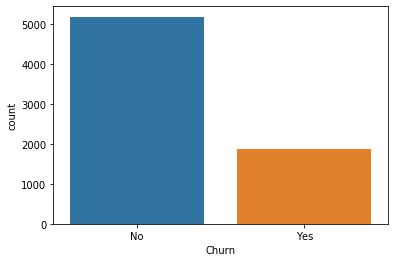

In [16]:
sns.countplot(data.Churn)

Observation: <br>
•We see that more number of customers have not churned as compared to customers that have churned

#### 2.Gender:

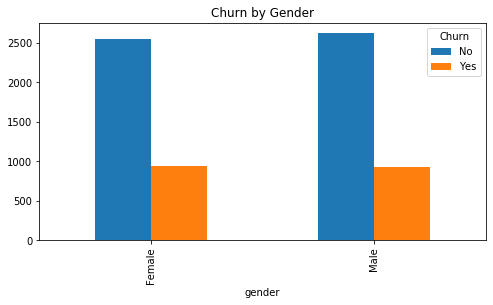

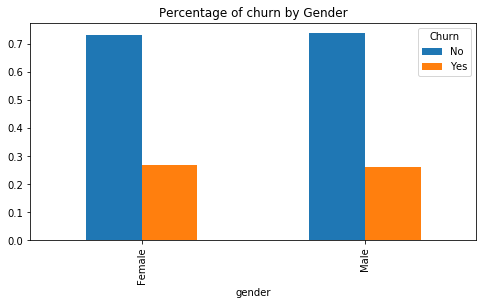

In [17]:
# churn by gender
gender = data.groupby('gender')['Churn'].value_counts(normalize=False).unstack().plot(kind='bar', figsize=(8,4))
gender.set_title("Churn by Gender")
plt.show()
gender_percentage= data.groupby('gender')['Churn'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(8,4))
gender_percentage.set_title("Percentage of churn by Gender")
plt.show()

Observations: <br>
•The split between male and female is almost the same.<br>
•Gender does not seem to have much significance while predicting the churn.<br>

#### 3. Senior Citizen

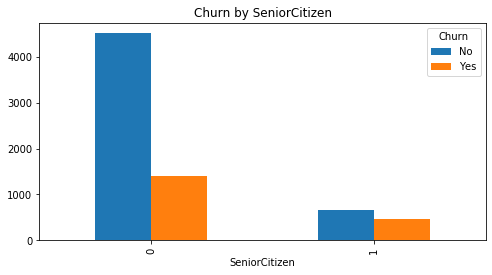

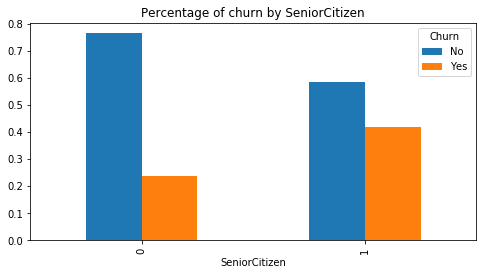

In [18]:
# churn by SeniorCitizen
seniorcitizen= data.groupby('SeniorCitizen')['Churn'].value_counts(normalize=False).unstack().plot(kind='bar', figsize=(8,4))
seniorcitizen.set_title("Churn by SeniorCitizen")
plt.show()
seniorcitizen_percentage = data.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(8,4))
seniorcitizen_percentage.set_title("Percentage of churn by SeniorCitizen")
plt.show()

Observations:<br>
•Out of 7043 customers, count of seniors citizens is around 25 % of the total customers.<br>
•Senior citizens are likely to churn as compared to non senior citizens.<br>

#### 4. Partner:

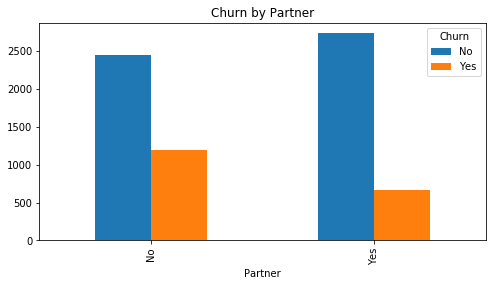

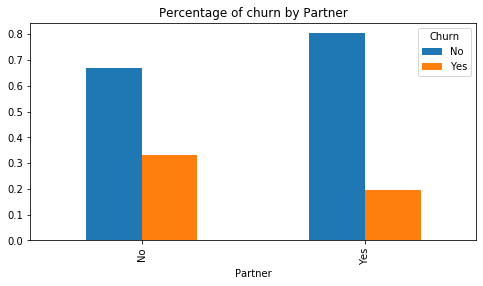

In [19]:
# churn by Partner
partner = data.groupby('Partner')['Churn'].value_counts(normalize=False).unstack().plot(kind='bar', figsize=(8,4))
partner.set_title("Churn by Partner")
plt.show()
partner_percentage = data.groupby('Partner')['Churn'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(8,4))
partner_percentage.set_title("Percentage of churn by Partner")
plt.show()

Observations:<br>
•We can see that the count of the customers with partners and customers are without partners nearly same.<br>
•There is a noticeable difference in the churn as of the customers with partners who have unsubscribed as compared to the single customers.

#### 5. Dependants:

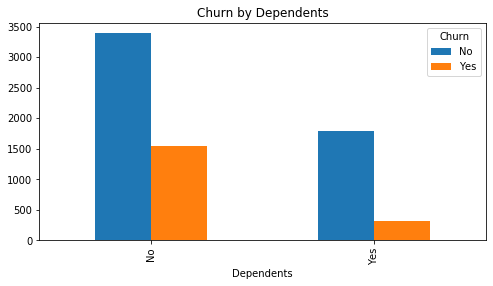

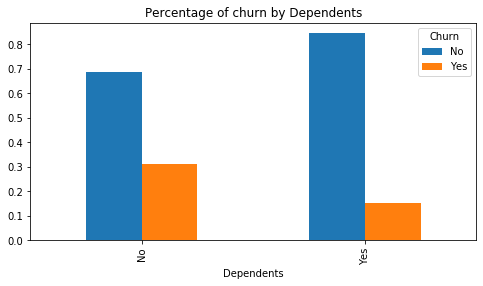

In [20]:
# churn by Dependants
dependents = data.groupby('Dependents')['Churn'].value_counts(normalize=False).unstack().plot(kind='bar', figsize=(8,4))
dependents.set_title("Churn by Dependents")
plt.show()
dependents_percentage = data.groupby('Dependents')['Churn'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(8,4))
dependents_percentage.set_title("Percentage of churn by Dependents")
plt.show()

Observations:<br>
•30% of customers who do not have dependents churn.<br>
•15% of these customers have churned are the ones who have dependents.<br>

#### 6.Phone Service:

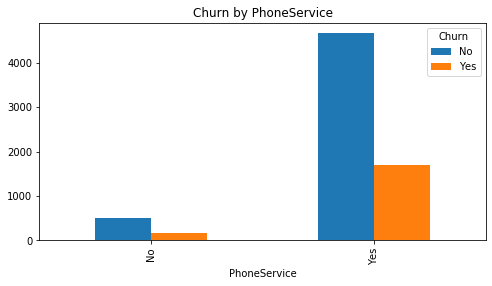

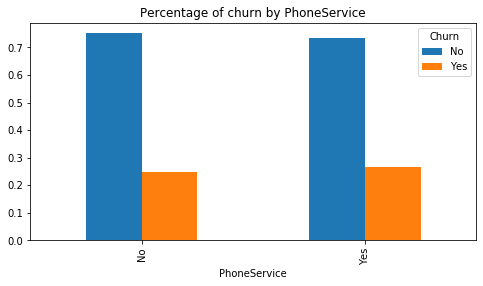

In [21]:
# churn by PhoneService
phoneservice = data.groupby('PhoneService')['Churn'].value_counts(normalize=False).unstack().plot(kind='bar', figsize=(8,4))
phoneservice.set_title("Churn by PhoneService")
plt.show()
phoneservice_percentage = data.groupby('PhoneService')['Churn'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(8,4))
phoneservice_percentage.set_title("Percentage of churn by PhoneService")
plt.show()

Observations:<br>
•More number of customers have subscribed to phone services than those who have not subscribed.<br>
•However there is no significant difference on the churn rate when we consider phone service .

#### 7.Multiple Lines:

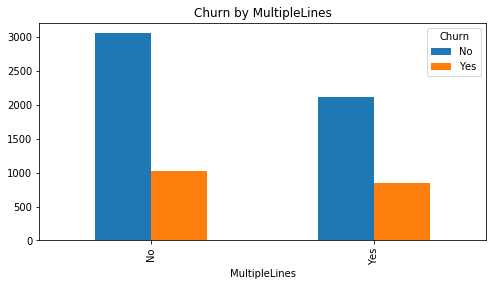

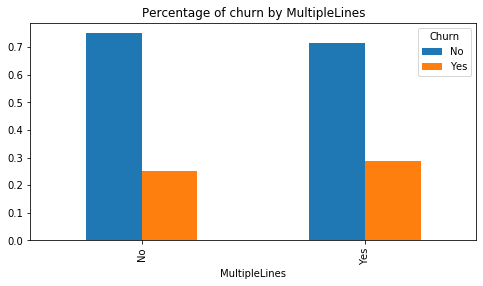

In [22]:
# churn by MultipleLines
multiplelines = data.groupby('MultipleLines')['Churn'].value_counts(normalize=False).unstack().plot(kind='bar', figsize=(8,4))
multiplelines.set_title("Churn by MultipleLines")
plt.show()
multiplelines_percentage = data.groupby('MultipleLines')['Churn'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(8,4))
multiplelines_percentage.set_title("Percentage of churn by MultipleLines")
plt.show()

Observations:<br>
•The customers who have churned with single lines is almost 25% whereas the customers who have churned with multiple lines is almost 30%.<br>
•There is not much difference between the customers with multiple lines and those with single lines.<br>

#### 8.Internet Services:

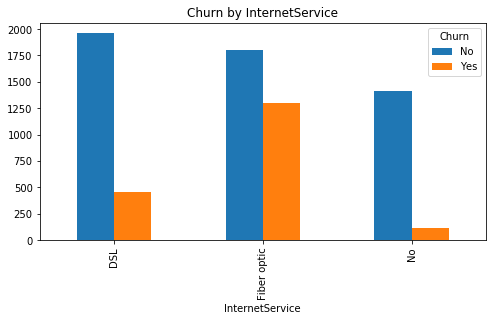

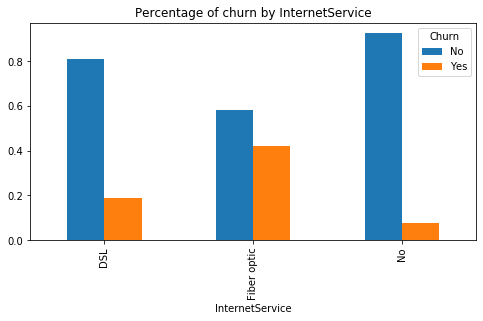

In [23]:
# churn by InternetService
internetservices = data.groupby('InternetService')['Churn'].value_counts(normalize=False).unstack().plot(kind='bar', figsize=(8,4))
internetservices.set_title("Churn by InternetService")
plt.show()
internetservices_percentages = data.groupby('InternetService')['Churn'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(8,4))
internetservices_percentages.set_title("Percentage of churn by InternetService")
plt.show()

Observations:<br>
•Customers with fiber optic cable have churned more followed by dsl and then with no internet services.<br>
•Churn rate of customers with Fiber optic cable is 40% while that of DSL is 19% and those with no internest services is 8%.<br>
•There is a noticeable difference in churn between the three different groups.

#### 9.Online Security:

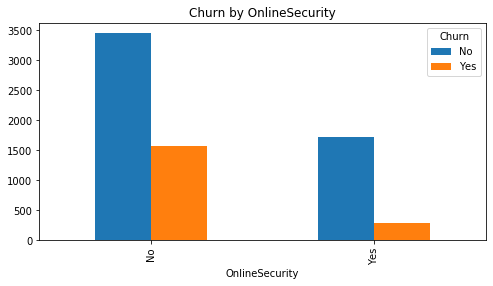

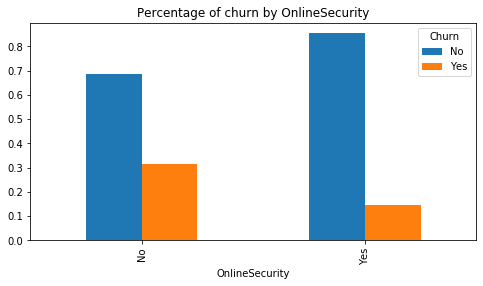

In [24]:
# churn by OnlineSecurity
onlinesecurity = data.groupby('OnlineSecurity')['Churn'].value_counts(normalize=False).unstack().plot(kind='bar', figsize=(8,4))
onlinesecurity.set_title("Churn by OnlineSecurity")
plt.show()
onlinesecurity_percentage = data.groupby('OnlineSecurity')['Churn'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(8,4))
onlinesecurity_percentage.set_title("Percentage of churn by OnlineSecurity")
plt.show()

Observations:<br>
•Count of customers without online security who have churned is more than the customers with online security.<br>
•Churn rate of customers without online security is 30% while those with online security is 15%.

#### 10.Online backup:

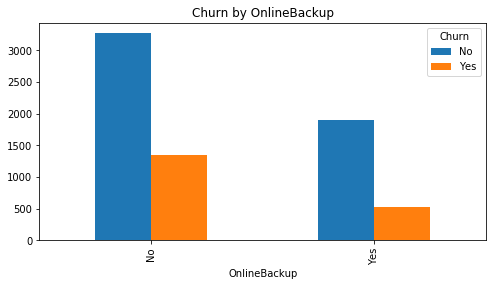

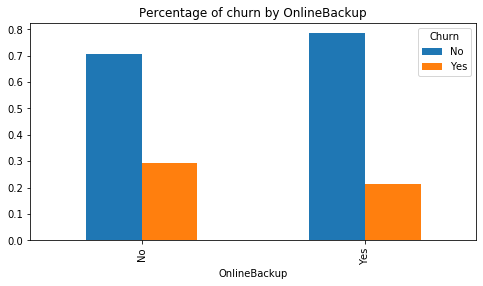

In [25]:
# churn by OnlineSecurity removing the customers without internet service to avoid duplicating results already presented
onlinebackup = data[data['OnlineBackup'] != 'No internet service'].groupby('OnlineBackup')['Churn'].value_counts(normalize=False).unstack().plot(kind='bar', figsize=(8,4))
onlinebackup.set_title("Churn by OnlineBackup")
plt.show()
onlinebackup_percentage = data[data['OnlineBackup'] != 'No internet service'].groupby('OnlineBackup')['Churn'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(8,4))
onlinebackup_percentage.set_title("Percentage of churn by OnlineBackup")
plt.show()

Observation:<br>
•There is a significant difference in churn rate.

#### 11.Device Protection:

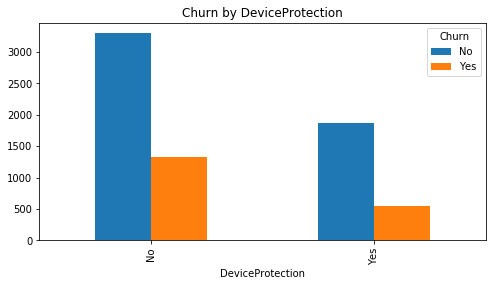

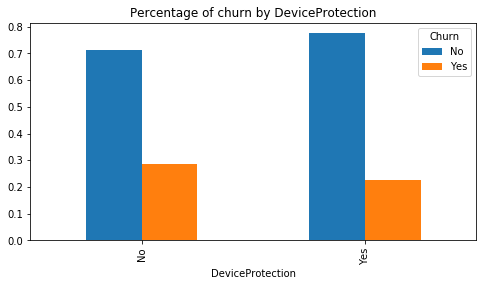

In [26]:
# churn by DeviceProtection removing the customers without internet service to avoid duplicating results already presented
deviceprotection = data[data['DeviceProtection'] != 'No internet service'].groupby('DeviceProtection')['Churn'].value_counts(normalize=False).unstack().plot(kind='bar', figsize=(8,4))
deviceprotection.set_title("Churn by DeviceProtection")
plt.show()
deviceprotection_percentage = data[data['DeviceProtection'] != 'No internet service'].groupby('DeviceProtection')['Churn'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(8,4))
deviceprotection_percentage.set_title("Percentage of churn by DeviceProtection")
plt.show()

Observation:<br>
•Churn rate of customers without device protection is 29% and that the customers with device protection is 24%.<br>
•There is not much difference.

#### 12.Tech Support:

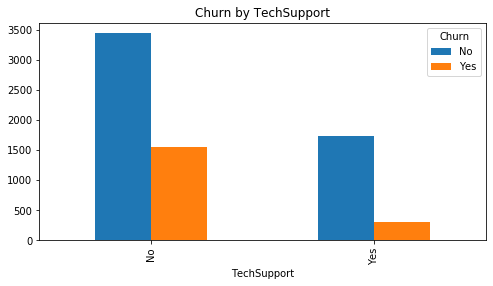

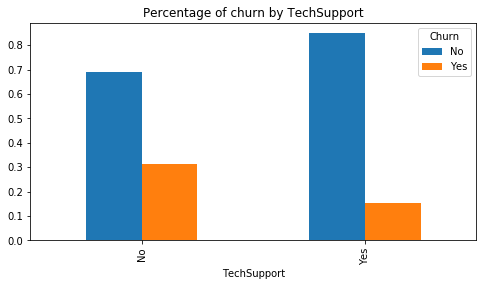

In [27]:
# churn by TechSupport removing the customers without internet service to avoid duplicating results already presented
techsupport = data[data['TechSupport'] != 'No internet service'].groupby('TechSupport')['Churn'].value_counts(normalize=False).unstack().plot(kind='bar', figsize=(8,4))
techsupport.set_title("Churn by TechSupport")
plt.show()
techsupport_percentage = data[data['TechSupport'] != 'No internet service'].groupby('TechSupport')['Churn'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(8,4))
techsupport_percentage.set_title("Percentage of churn by TechSupport")
plt.show()

Observation:<br>
•Churn rate of customers without tech support is 30% while those with techsupport is 15%.<br>
•There seems to be a significant difference in behaviour between customers with and without tech support.

#### 13.Streaming TV

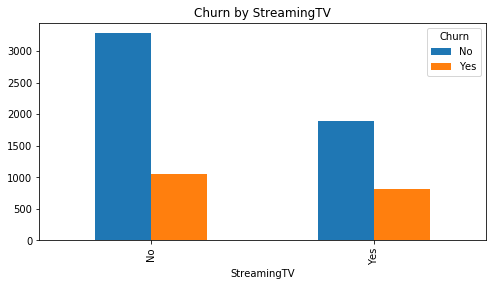

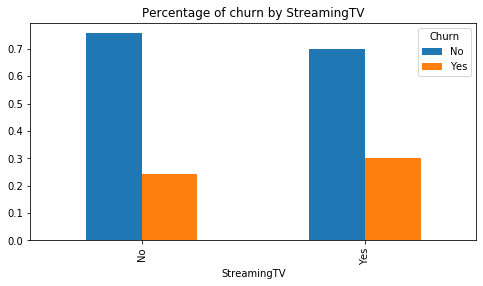

In [28]:
# churn by StreamingTV removing the customers without internet service to avoid duplicating results already presented
tv = data[data['StreamingTV'] != 'No internet service'].groupby('StreamingTV')['Churn'].value_counts(normalize=False).unstack().plot(kind='bar', figsize=(8,4))
tv.set_title("Churn by StreamingTV")
plt.show()
tv_percentage = data[data['StreamingTV'] != 'No internet service'].groupby('StreamingTV')['Churn'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(8,4))
tv_percentage.set_title("Percentage of churn by StreamingTV")
plt.show()

Observation:<br>
•Churn rate of customers streaming tv is 29% while those not streaming tv is 25%.<br>
•There is not much significant difference in behaviour between customers with and without tv streaming service.

#### 14.Streaming Movies:

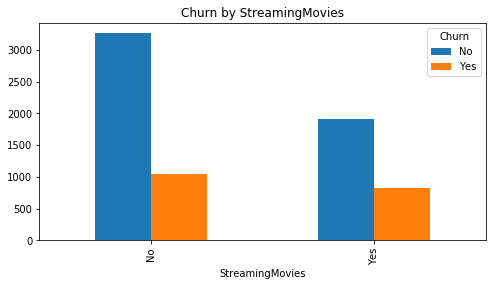

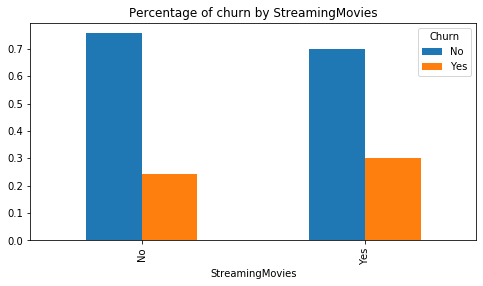

In [29]:
# churn by StreamingMovies removing the customers without internet service to avoid duplicating results already presented
streamingmovies = data[data['StreamingMovies'] != 'No internet service'].groupby('StreamingMovies')['Churn'].value_counts(normalize=False).unstack().plot(kind='bar', figsize=(8,4))
streamingmovies.set_title("Churn by StreamingMovies")
plt.show()
streamingmovies_percentage = data[data['StreamingMovies'] != 'No internet service'].groupby('StreamingMovies')['Churn'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(8,4))
streamingmovies_percentage.set_title("Percentage of churn by StreamingMovies")
plt.show()

Observation:<br>
•Churn rate of customers streaming tv is 30% while those not streaming tv is almost 24%.<br>
•There is not much significant difference in behaviour between customers with and without movies streaming service.

#### 15. Contract:

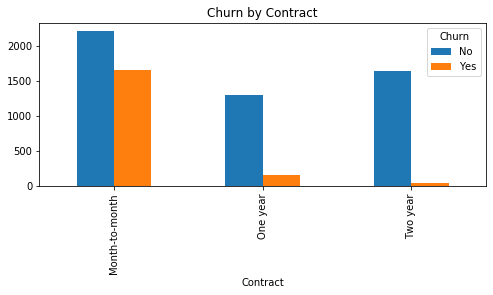

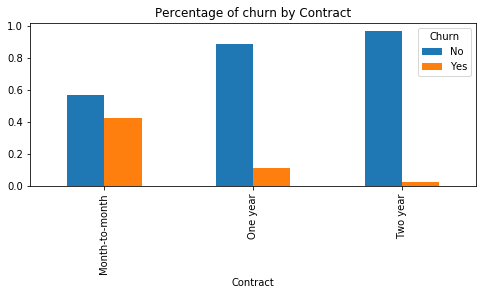

In [30]:
# churn by Contract
contract = data.groupby('Contract')['Churn'].value_counts(normalize=False).unstack().plot(kind='bar', figsize=(8,3))
contract.set_title("Churn by Contract")
plt.show()
contract_percentage = data.groupby('Contract')['Churn'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(8,3))
contract_percentage.set_title("Percentage of churn by Contract")
plt.show()


Observation:<br>
•Customers with monthly contracts is more than the ones that are bound with one year and two year contracts.<br>
•Churn rate of customers with month-to-month contract is 43% while those with one-year contract is 15% and those with two-year contract is much less.<br>
•The longer the customers contract last for the less likely they are to churn.<br>
•There is a significant difference in behaviour between customers depending on the period they are locked in their contract.

#### 16. Paperless Billing:

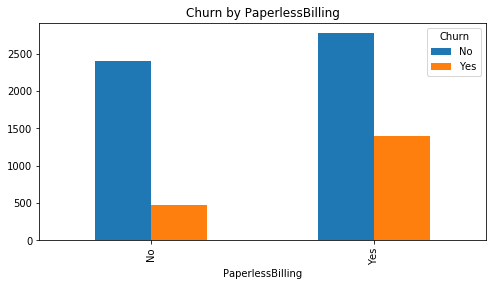

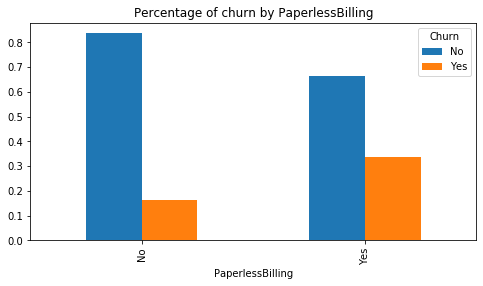

In [31]:
# churn by PaperlessBilling
paperlessbilling = data.groupby('PaperlessBilling')['Churn'].value_counts(normalize=False).unstack().plot(kind='bar', figsize=(8,4))
paperlessbilling.set_title("Churn by PaperlessBilling")
plt.show()
paperlessbilling_percentage = data.groupby('PaperlessBilling')['Churn'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(8,4))
paperlessbilling_percentage.set_title("Percentage of churn by PaperlessBilling")
plt.show()

Observation:<br>
•There are more number of customers who have opted for paperless billing as compared to paper billing.<br>
•Churn rate of customers who have opted for paperless billing is32% while those who have opted for paper billing is 17%.<br>
•There is significant difference in behaviour between customers that are paperless compared to paper billing.

#### 17. Payment Method:

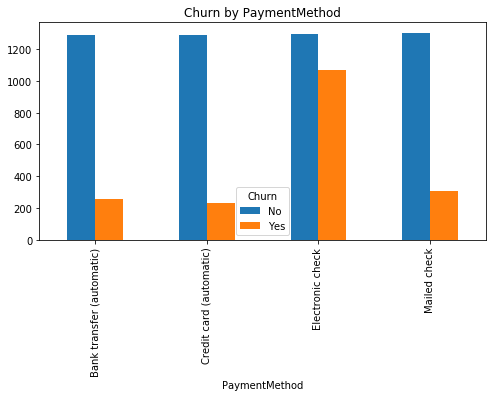

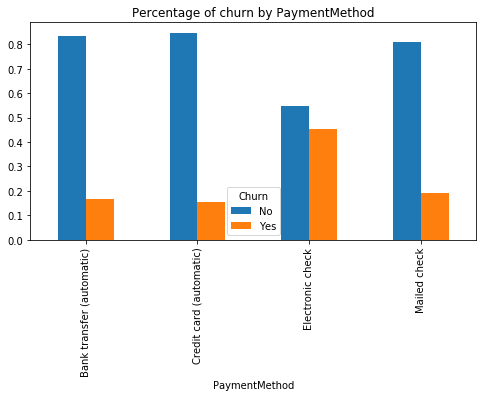

In [32]:
# churn by PaymentMethod
paymentmethod = data.groupby('PaymentMethod')['Churn'].value_counts(normalize=False).unstack().plot(kind='bar', figsize=(8,4))
paymentmethod.set_title("Churn by PaymentMethod")
plt.show()
paymentmethod_percentage = data.groupby('PaymentMethod')['Churn'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(8,4))
paymentmethod_percentage.set_title("Percentage of churn by PaymentMethod")
plt.show()

Observation:<br>
•Customers with electronic check payment method is more but their churn rate is also highest with 48%.<br>
•Churn rate of customers with mailed check payment method is 19%.<br>
•Churn rate of customers with bank transfer payment method is 17%.<br>
•Churn rate of customers with credit card payment method is 16%.<br>
•There is a difference in behaviour between customers depending the method of payment they prefer.

#### 18.Tenure:

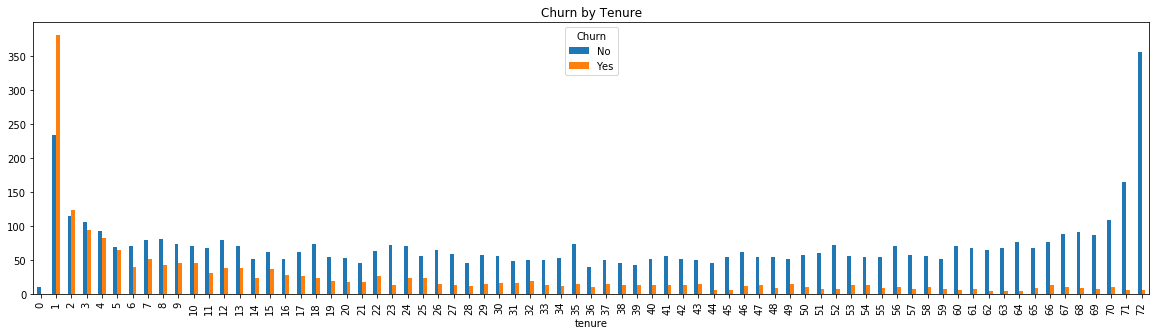

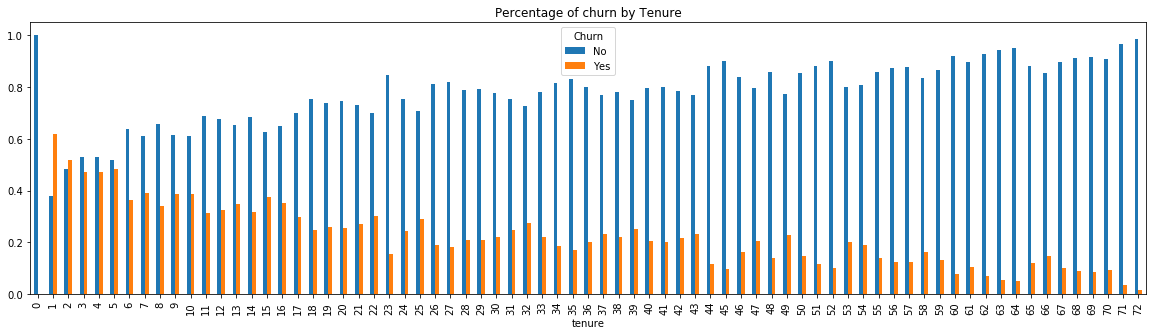

In [33]:
#churn by tenure
tenure = data.groupby('tenure')['Churn'].value_counts(normalize=False).unstack().plot(kind='bar', figsize=(20,5))
tenure.set_title("Churn by Tenure")
plt.show()
tenure_percentage = data.groupby('tenure')['Churn'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(20,5))
tenure_percentage.set_title("Percentage of churn by Tenure")
plt.show()

Observation:<br>
•Customers have on average a tenure of 32 months, most of the customers stay between 9 and 55 months..<br>
•The first month of subscription seems to be the high risk month with over 50% of the churn.<br>
•It seems that the longer the customer stay subscribe the less likely they are to leave in the future..<br>

#### 19. MonthlyCharges:

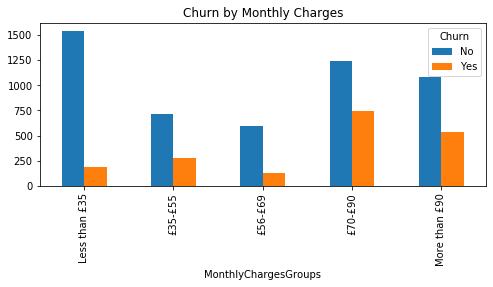

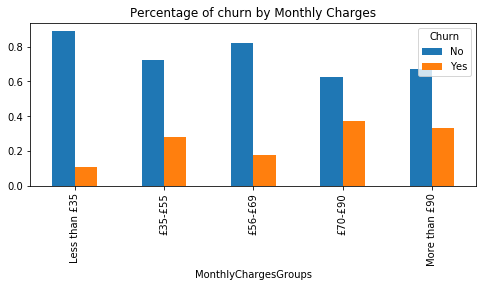

In [34]:
# create monthly charges groups
group1= [0,35,56,70,91,120]
labels = ['Less than £35', '£35-£55', '£56-£69', '£70-£90', 'More than £90']
data['MonthlyChargesGroups'] = pd.cut(data['MonthlyCharges'], bins=group1, labels=labels, right=False)

#churn by monthly charges
monthlycharges = data.groupby('MonthlyChargesGroups')['Churn'].value_counts(normalize=False).unstack().plot(kind='bar', figsize=(8,3))
monthlycharges.set_title("Churn by Monthly Charges")
plt.show()
monthlycharges_percentage = data.groupby('MonthlyChargesGroups')['Churn'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(8,3))
monthlycharges_percentage.set_title("Percentage of churn by Monthly Charges")
plt.show()

Observation:<br>
•Churn rate of customers with monthly charges less than £35 is 10%.<br>
•Churn rate of customers with monthly charges between £35 and £55 is 30%.<br>
•Churn rate of customers with monthly charges between £56 and £69 is 20%.<br>
•Churn rate of customers with monthly charges between £70 and £90, is 37%.<br>
•Churn rate of customers with monthly charges more than £90 is 35%.<br>
•There seems to be a positive relationship between the churn rate and the monthly charges.

#### 20.Total Charges:

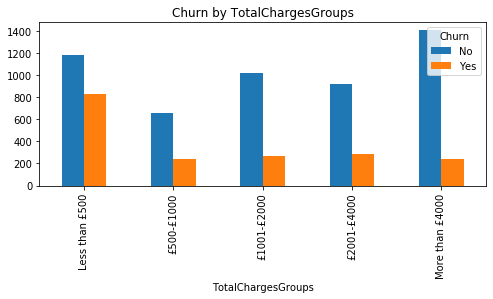

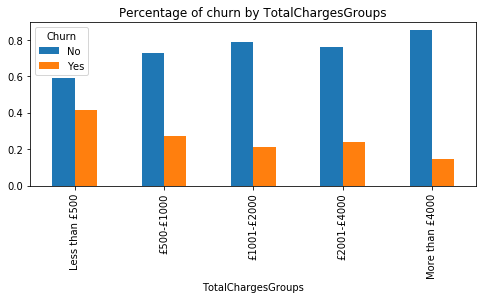

In [35]:
# create total  charges groups
group2= [0,500,1001,2001,4001,9000]
labels = ['Less than £500', '£500-£1000', '£1001-£2000', '£2001-£4000', 'More than £4000']
data['TotalChargesGroups'] = pd.cut(data['TotalCharges'], bins=group2, labels=labels, right=False)

# churn by TotalChargesGroups
totalcharges = data.groupby('TotalChargesGroups')['Churn'].value_counts(normalize=False).unstack().plot(kind='bar', figsize=(8,3))
totalcharges.set_title("Churn by TotalChargesGroups")
totalcharges_percentage = data.groupby('TotalChargesGroups')['Churn'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(8,3))
totalcharges_percentage.set_title("Percentage of churn by TotalChargesGroups")
plt.show()

In [36]:
MonthlyChargesGroups = data.MonthlyChargesGroups
data.drop('MonthlyChargesGroups', axis=1, inplace=True)
TotalChargesGroups = data.TotalChargesGroups
data.drop('TotalChargesGroups', axis=1, inplace=True)

Observation:<br>
•Churn rate of customers with total charges less than £500 is 41%.<br>
•Churn rate of customers with total charges between £500 and £1000 is 29%.<br>
•Churn rate of customers with total charges between £1001 and £2000 is 22%.<br>
•Churn rate of customers with total charges between £2001 and £4000 is 24%.<br>
•Churn rate of customers with total charges above £4000 is 15%.<br>
•There seems to be a positive relationship between the churn rate and the total charges

### Label Encoding
Converting categorical data into numeric data

In [37]:
le = preprocessing.LabelEncoder() 
data[categoryColumns] = data[categoryColumns].apply(le.fit_transform)

data.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,2,29.85,29.85
1,0,1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,3,56.95,1889.50
2,1,1,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,3,53.85,108.15
3,0,1,0,0,0,45,0,0,0,1,0,1,1,0,0,1,0,0,42.30,1840.75
4,1,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65


#### Heatmap
Shows correlation between all the parameters

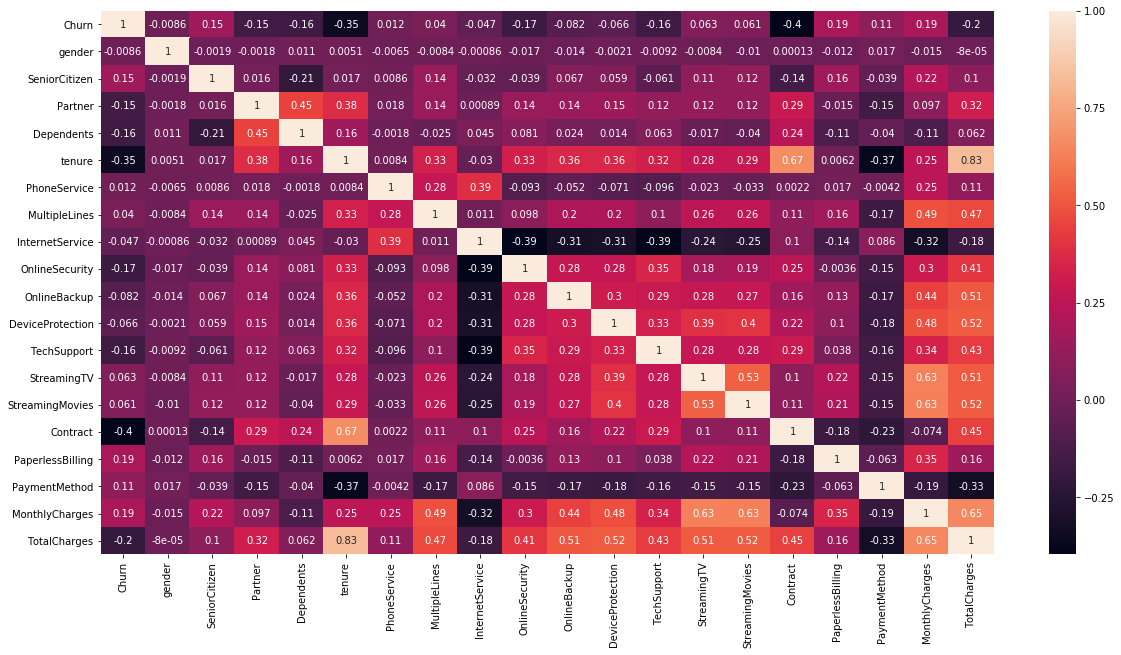

In [38]:
def show_correlations(dataframe, show_chart = True):
    fig = plt.figure(figsize = (20,10))
    corr = dataframe.corr()
    if show_chart == True:
        sns.heatmap(corr, 
                    xticklabels=corr.columns.values,
                    yticklabels=corr.columns.values,
                    annot=True)
    return corr

correlation_df = show_correlations(data,show_chart=True)

### Model Building

The target variable is Churn: 

In [39]:
y = data.Churn

The features used to predict the target variable are:

In [40]:
X = data[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       ]]


#### Splitting the data
Splitted the dataset in two parts with a small fraction (20%) became the validation (testing) set with which the model is evaluated and the rest (80%) is used to train the model.

In [41]:
#split the data into train and test
def set_traintest_data():
    global X, y, X_train, X_test, y_train, y_test
    X, y = data.drop('Churn',axis=1), data['Churn']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
    print('Train Shape', X_train.shape, y_train.shape)
    print('Test Shape', X_test.shape, y_test.shape)

In [42]:
def metrices(model):
    y_pred = model.predict(X_test)
    matrix = confusion_matrix(y_test, y_pred)
    print(matrix, '\n')
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    print('Accuracy: ', (tp + tn) / np.sum(matrix), '\n')
    print('False Negative: ', fn, '\n')
    print('Precision: ', tp / (tp + fp), '\n')
    print('Recall: ', tp / (tp + fn), '\n')

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
Churn               7043 non-null int32
gender              7043 non-null int32
SeniorCitizen       7043 non-null int64
Partner             7043 non-null int32
Dependents          7043 non-null int32
tenure              7043 non-null int64
PhoneService        7043 non-null int32
MultipleLines       7043 non-null int32
InternetService     7043 non-null int32
OnlineSecurity      7043 non-null int32
OnlineBackup        7043 non-null int32
DeviceProtection    7043 non-null int32
TechSupport         7043 non-null int32
StreamingTV         7043 non-null int32
StreamingMovies     7043 non-null int32
Contract            7043 non-null int32
PaperlessBilling    7043 non-null int32
PaymentMethod       7043 non-null int32
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
dtypes: float64(2), int32(16), int64(2)
memory usage: 660.4 KB


In [44]:
set_traintest_data()
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Train Shape (5634, 19) (5634,)
Test Shape (1409, 19) (1409,)
Optimization terminated successfully.
         Current function value: 0.416875
         Iterations 8
                         Results: Logit
Model:               Logit            Pseudo R-squared: 0.280    
Dependent Variable:  Churn            AIC:              5910.1032
Date:                2020-05-06 12:44 BIC:              6040.4392
No. Observations:    7043             Log-Likelihood:   -2936.1  
Df Model:            18               LL-Null:          -4075.1  
Df Residuals:        7024             LLR p-value:      0.0000   
Converged:           1.0000           Scale:            1.0000   
No. Iterations:      8.0000                                      
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
gender           -0.0706   0.0634  -1.1138 0.2654 -0.1947  0.0536
Senio

#### Logistic Regression:

In [45]:
LogisticReg = LogisticRegression()
LogisticReg = LogisticReg.fit(X_train, y_train)

metrices(LogisticReg)


[[914 101]
 [176 218]] 

Accuracy:  0.8034066713981547 

False Negative:  176 

Precision:  0.6833855799373041 

Recall:  0.5532994923857868 



#### Naive Bayes:

In [46]:
NaiveBayes = GaussianNB()
NaiveBayes = NaiveBayes.fit(X_train, y_train)

metrices(NaiveBayes)

[[786 229]
 [102 292]] 

Accuracy:  0.7650816181689141 

False Negative:  102 

Precision:  0.5604606525911708 

Recall:  0.7411167512690355 



#### Decision Tree:

In [47]:
DecisionTree = DecisionTreeClassifier()
DecisionTree = DecisionTree.fit(X_train, y_train)

metrices(DecisionTree)

[[837 178]
 [198 196]] 

Accuracy:  0.7331440738112136 

False Negative:  198 

Precision:  0.5240641711229946 

Recall:  0.49746192893401014 



#### K-Nearest Neighbour :

In [48]:
knn = KNeighborsClassifier(n_neighbors=50)
knn = knn.fit(X_train,y_train)

metrices(knn)


[[955  60]
 [267 127]] 

Accuracy:  0.7679205110007097 

False Negative:  267 

Precision:  0.679144385026738 

Recall:  0.3223350253807107 



#### Random Forest:

In [49]:
RandomForest = RandomForestClassifier()
RandomForest = RandomForest.fit(X_train, y_train)

metrices(RandomForest)


[[936  79]
 [227 167]] 

Accuracy:  0.7828246983676366 

False Negative:  227 

Precision:  0.6788617886178862 

Recall:  0.42385786802030456 



#### Gradient Boosting:

In [50]:
GradientBoosting = GradientBoostingClassifier()
GradientBoosting = GradientBoosting.fit(X_train, y_train)

metrices(GradientBoosting)


[[917  98]
 [192 202]] 

Accuracy:  0.794180269694819 

False Negative:  192 

Precision:  0.6733333333333333 

Recall:  0.5126903553299492 



### Model Evaluation 

In [51]:
def sort_metrics(model):
    y_pred = model.predict(X_test)
    matrix = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    return((tp + tn) / np.sum(matrix), tp / (tp + fn), fn/7043 * 100)

models = pd.DataFrame({
    'models': [
    'Logistic Regression', 
    'Naive Bayes',
    'Decision Tree',
    'KNN',
    'Random Forest',
    'Gradient Boosting'
],

'FalseNegatives%': [
    sort_metrics(LogisticReg)[2],
    sort_metrics(NaiveBayes)[2],
    sort_metrics(DecisionTree)[2],
    sort_metrics(knn)[2],
    sort_metrics(RandomForest)[2],
    sort_metrics(GradientBoosting)[2]
    
],
    
'Recall': [
    sort_metrics(LogisticReg)[1],
    sort_metrics(NaiveBayes)[1],
    sort_metrics(DecisionTree)[1],
    sort_metrics(knn)[1],
    sort_metrics(RandomForest)[1],
    sort_metrics(GradientBoosting)[1]
    
],
    
'Accuracy': [
    sort_metrics(LogisticReg)[0],
    sort_metrics(NaiveBayes)[0],
    sort_metrics(DecisionTree)[0],
    sort_metrics(knn)[0],
    sort_metrics(RandomForest)[0],
    sort_metrics(GradientBoosting)[0]
    
],

})
models.sort_values(by=['Recall','Accuracy'], ascending=False)

,models,FalseNegatives%,Recall,Accuracy
1,Naive Bayes,1.448246,0.741117,0.765082
0,Logistic Regression,2.498935,0.553299,0.803407
5,Gradient Boosting,2.726111,0.512690,0.794180
2,Decision Tree,2.811302,0.497462,0.733144
4,Random Forest,3.223058,0.423858,0.782825
3,KNN,3.790998,0.322335,0.767921


### Conclusion:
This project concludes that Logistic Regression performs better in predicting the customer churn with 80.34% accuracy.The confusion matrix shows that 176 customers were predicted to stay members when they have in fact churned, this means that these customers would not be contacted to receive incentive in order to retain them.

### Future Scope:
Future scopes of this project, is that we can use Hybrid classification techniques to point out existing association between churn prediction and customer lifetime value.